# **Project Name**    - Flipkart Customer Service Satisfaction



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on analyzing customer interactions, feedback, and satisfaction scores from Flipkart to identify key factors influencing customer experience and service quality. By leveraging Python, Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn, the project aims to uncover trends in customer sentiment, improve support strategies, and enhance overall satisfaction.

# **GitHub Link -**

https://github.com/prathmeshpotdar/Flipkart-Customer-Service-Satisfaction

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd # importing pandas for  handling and data manuplation
import numpy as np  #importing numpy for mathematical operation
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns   #for data visualisation
from sklearn.model_selection import train_test_split #  splitting the dataset into traning and test sets
from sklearn.ensemble import RandomForestClassifier  #machine learning model for classification
from sklearn.metrics import accuracy_score , classification_report    #TO eevaluate model performance

### Dataset Loading

In [2]:
# Load Dataset
file_path = "/content/Customer_support_data.csv"
df = pd.read_csv(file_path)

Data Cleaning and Preprocessing

In [3]:
#Converting date and columns to datetime format
date_cols = ["order_date_time" , "Issue_reported at", "issue_responded", "Survey_response_Date"]
for col in date_cols:
  df[col] = pd.to_datetime(df[col], errors = "coerce")         #error = coerce ensures invalid date values are converted to NaT i.e. not a time

/tmp/ipython-input-3459950817.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors = "coerce")         #error = coerce ensures invalid date values are converted to NaT i.e. not a time
/tmp/ipython-input-3459950817.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors = "coerce")         #error = coerce ensures invalid date values are converted to NaT i.e. not a time


Handle Missing Values

In [4]:
#df['Customer Remarks'].fillna("No Remarks", inplace=True)
#df['Item_price'].fillna(df['Item_price'].median(), inplace=True)
#df.drop(columns=['Customer_City', 'connected_handling_time'], inplace=True)  # Too many missing values

df['Customer Remarks'] = df['Customer Remarks'].fillna("No Remarks")     #Filling missing values in customer remarks with no remarks
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())    # fills missing values


Dropping columns that have too many missing values

In [5]:
#if 'Customer_City' in df.columns:
    #df.drop(columns=['Customer_City'], inplace=True)  # Too many missing values
if 'connected_handling_time' in df.columns:
    df.drop(columns=['connected_handling_time'], inplace=True)

In [6]:
#Feature enginnering
#Calculating Response time

df["response_time"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds()
df["response_time"] = df["response_time"].fillna(df["response_time"].median())

Analyzing and Visulaizing data

/tmp/ipython-input-826799858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CSAT Score", data = df , palette = "viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

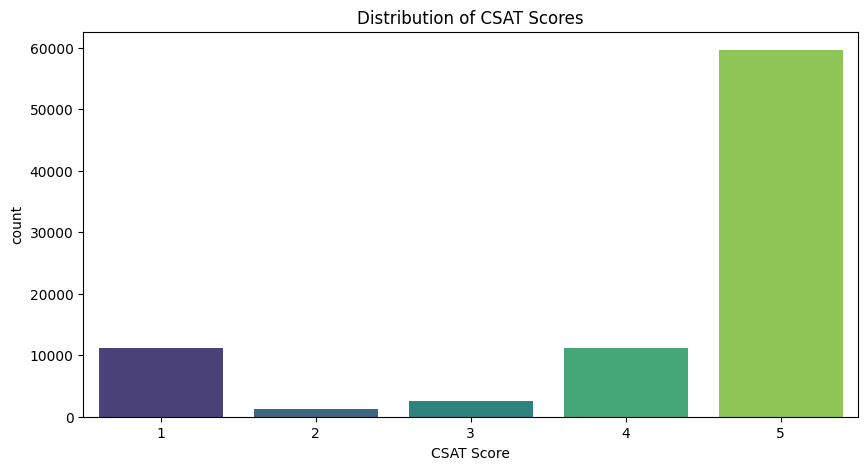

In [7]:
#For CSAT Score distribution
plt.figure(figsize=(10,5))
sns.countplot(x="CSAT Score", data = df , palette = "viridis")
plt.title("Distribution of CSAT Scores")
plt.show

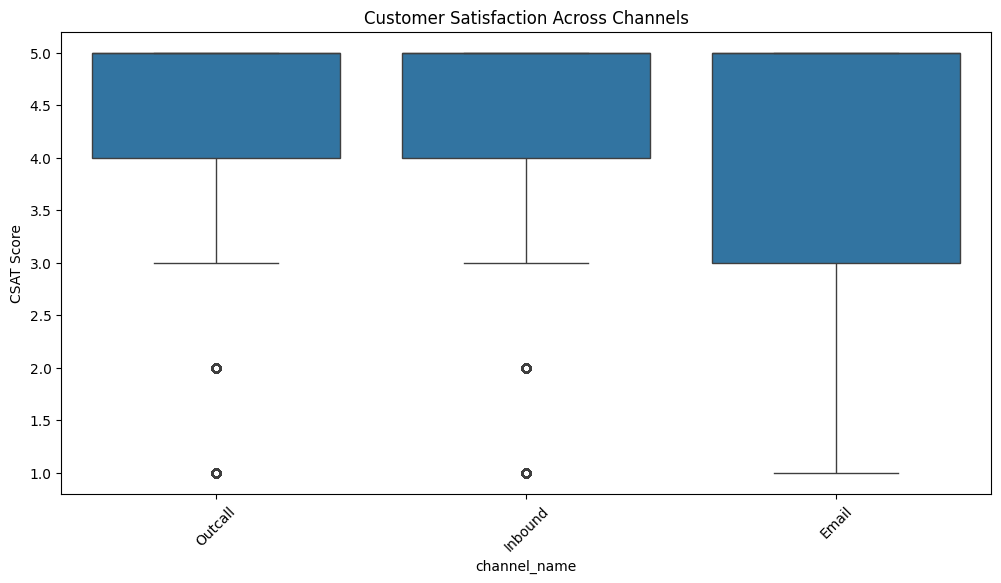

In [8]:
#Satisfaction across different support channels/ differnet mediums;
plt.figure(figsize = (12,6))
sns.boxplot(x = "channel_name", y = "CSAT Score" , data = df)
plt.xticks(rotation = 45)
plt.title("Customer Satisfaction Across Channels")
plt.show()

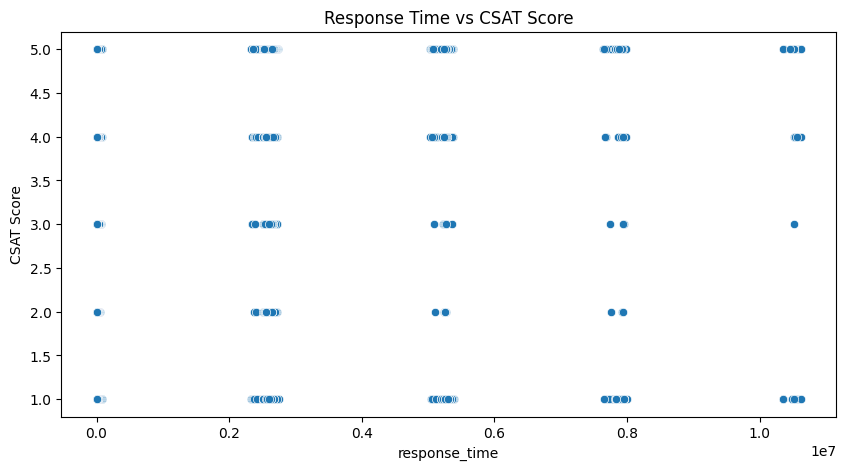

In [9]:
# Comparing Response Time vs Csat Score
plt.figure(figsize = (10 , 5))
sns.scatterplot(x = "response_time" , y = "CSAT Score" , data = df)
plt.title("Response Time vs CSAT Score")
plt.show()

Model Training

In [10]:
#Selcting relevant features for predictions
features = ["response_time" , "Item_price", "channel_name", "category" , "Tenure Bucket" , "Agent Shift"]
df_model = df[features + ["CSAT Score"]]
df_model = pd.get_dummies(df_model , drop_first = True) #One hot encoding for categorial features

In [11]:
#Spitting Data Into Train and Test Sets
X = df_model.drop(columns=['CSAT Score'])
y = df_model['CSAT Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Dataset First View

In [12]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,No Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaT,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,NaN,NaN,979.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,2040.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,No Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,NaT,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,NaN,NaN,979.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,120.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,No Remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaT,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,NaN,NaN,979.0,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,1320.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,No Remarks,5aed0059-55a4-4ec6-bb54-97942092020a,NaT,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,NaN,NaN,979.0,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,1200.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,No Remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaT,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,NaN,NaN,979.0,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,120.0


### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 85907
Number of columns: 20


### Dataset Information

In [14]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique id             85907 non-null  object        
 1   channel_name          85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      85907 non-null  object        
 5   Order_id              67675 non-null  object        
 6   order_date_time       17214 non-null  datetime64[ns]
 7   Issue_reported at     31974 non-null  datetime64[ns]
 8   issue_responded       31885 non-null  datetime64[ns]
 9   Survey_response_Date  85907 non-null  datetime64[ns]
 10  Customer_City         17079 non-null  object        
 11  Product_category      17196 non-null  object        
 12  Item_price            85907 non-null  float64       
 13  Agent_name      

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
print(f"Number of duplicate values: {df.duplicated().sum()}")

Number of duplicate values: 0


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Unique id                   0
channel_name                0
category                    0
Sub-category                0
Customer Remarks            0
Order_id                18232
order_date_time         68693
Issue_reported at       53933
issue_responded         54022
Survey_response_Date        0
Customer_City           68828
Product_category        68711
Item_price                  0
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
response_time               0
dtype: int64


In [17]:
# Visualizing the missing values

### What did you know about your dataset?

The dataset captures customer interactions,feedback and satisfaction scores across variuos support channels of flipkart. It includes details such as customer service channel issue reported ,order information and customer feedback .It contains both categorical and numerical data.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
df.columns.tolist()

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score',
 'response_time']

In [19]:
# Dataset Describe
df.describe()

,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Item_price,CSAT Score,response_time
count,17214,31974,31885,85907,85907.000000,85907.000000,8.590700e+04
mean,2023-07-28 15:49:45.820843520,2023-07-03 05:04:46.427097344,2023-07-03 11:42:31.621138432,2023-08-16 10:18:31.760392192,1916.695624,4.242157,1.028990e+05
min,2022-01-16 13:15:00,2023-01-08 00:00:00,2023-01-08 00:00:00,2023-08-01 00:00:00,0.000000,1.000000,0.000000e+00
25%,2023-07-27 22:49:15,2023-04-08 13:34:00,2023-04-08 13:39:00,2023-08-09 00:00:00,979.000000,4.000000,3.600000e+02
50%,2023-08-04 22:16:30,2023-07-08 16:40:00,2023-07-08 16:52:00,2023-08-16 00:00:00,979.000000,5.000000,3.600000e+02
75%,2023-08-10 07:30:15,2023-10-08 11:19:00,2023-10-08 11:21:00,2023-08-24 00:00:00,979.000000,5.000000,3.600000e+02
max,2023-12-08 23:36:00,2023-12-08 23:59:00,2023-12-08 23:59:00,2023-08-31 00:00:00,164999.000000,5.000000,1.062582e+07
std,NaN,NaN,NaN,NaN,6037.903897,1.378903,6.373779e+05


### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
df.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18232
Order_id,67675
order_date_time,13766
Issue_reported at,11937
issue_responded,12032
Survey_response_Date,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:


# Convert date columns to datetime objects
df["Issue_reported at"] = pd.to_datetime(df["Issue_reported at"], format='%d/%m/%Y %H:%M')
df["issue_responded"] = pd.to_datetime(df["issue_responded"], format='%d/%m/%Y %H:%M')

df["Issue_reported at {formatted}"] = df["Issue_reported at"].dt.strftime('%d/%m/%y')
df["issue_responded {formatted}"] = df["issue_responded"].dt.strftime('%d/%m/%y')

# Calculate response time in seconds
df["Time difference"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds()/60

In [22]:
#Remove columns that have a lot of null values
rem=['order_date_time','Customer Remarks']
ectr=[col for col in rem if col in df.columns]
if ectr:
  df=df.drop(columns=rem)
  print('Columns removed successfully')
else:
  print('No columns to remove')

Columns removed successfully


### What all manipulations have you done and insights you found?

Columns having too many null values have been removed which includes customer remarks connected handling time and order date so its been found csat score depends on remaining values .date format has been changed to appropriate format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-2972555442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CSAT Score", data = df , palette = "viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

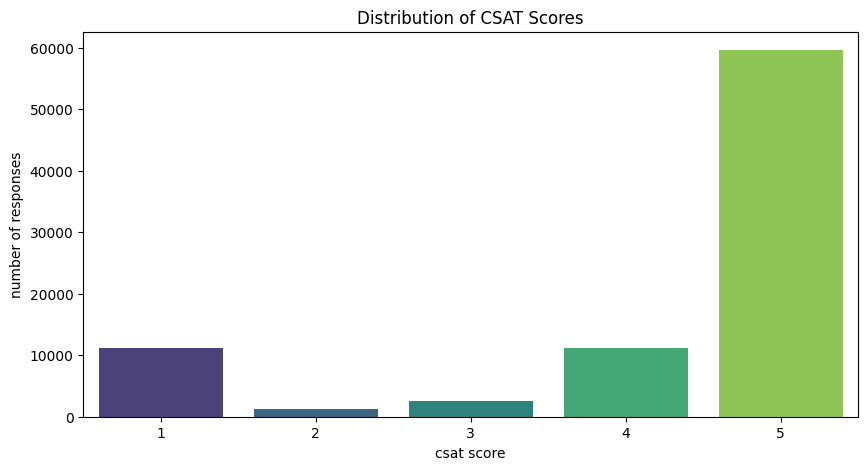

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x="CSAT Score", data = df , palette = "viridis")
plt.title("Distribution of CSAT Scores")
plt.xlabel('csat score')
plt.ylabel('number of responses')
plt.show

##### 1. Why did you pick the specific chart?

a grouped bar chart allows comparison of csat scores accross different channel

##### 2. What is/are the insight(s) found from the chart?

certain channel like email have higher satisfaction scores compared to others like phone indicating varying effectiveness accross channels

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

identifying underperforming channel can guide resources allocation and training to improve customer satisfaction

#### Chart - 2

/tmp/ipython-input-3795637656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Agent Shift", y = "Time difference" , data = df,palette='Set2')


Text(0, 0.5, 'time difference')

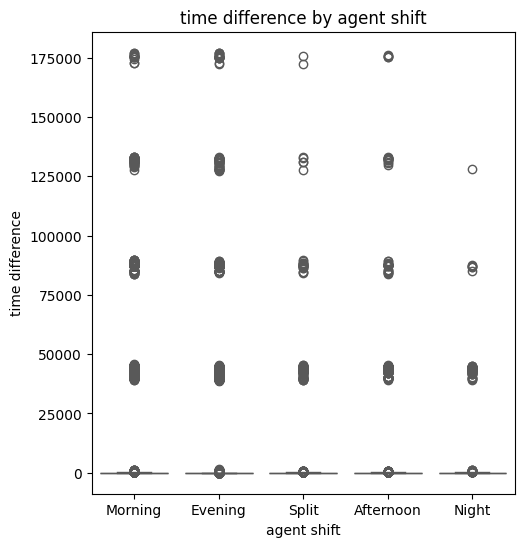

In [24]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,2)
sns.boxplot(x = "Agent Shift", y = "Time difference" , data = df,palette='Set2')
plt.title("time difference by agent shift")
plt.xlabel('agent shift')
plt.ylabel('time difference')

##### 1. Why did you pick the specific chart?

The boxplot showing time difference by agent shift provides a visual summory of the distribution of time difference for each shift period it shows variability of data outlier,etc

##### 2. What is/are the insight(s) found from the chart?

morning might show a narrower interquartile range and lower median time difference suggesting more consistent and quicker response times

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes it can be found that morning are peak productive time from this or more people work in morning

#### Chart - 3

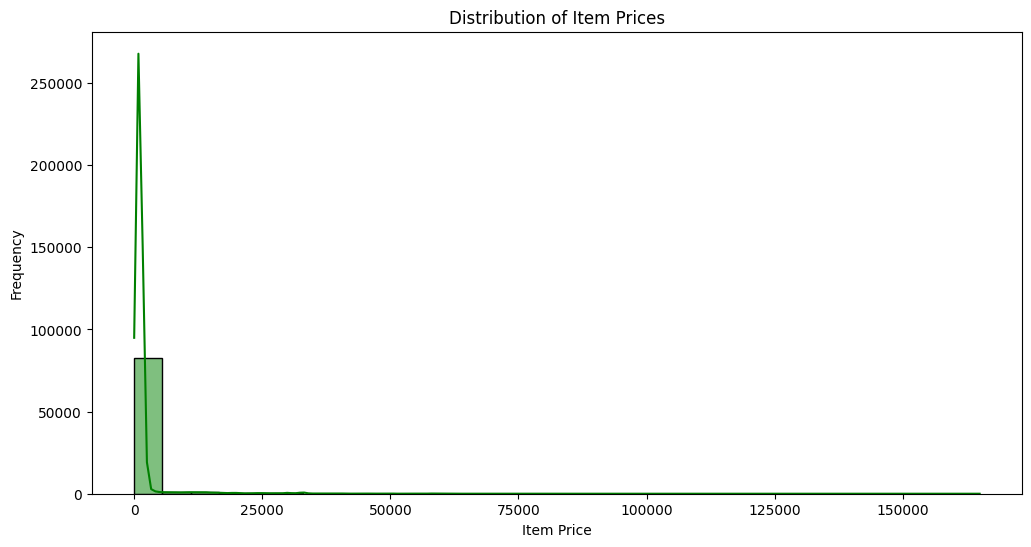

In [25]:
#distribution of time pricing
plt.figure(figsize=(12,6))
sns.histplot(df['Item_price'], kde=True,bins=30,color='green')
plt.title('Distribution of Item Prices')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

To find categorical majority of prices of products


##### 2. What is/are the insight(s) found from the chart?

most products are from less then 25000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

not really

#### Chart - 4

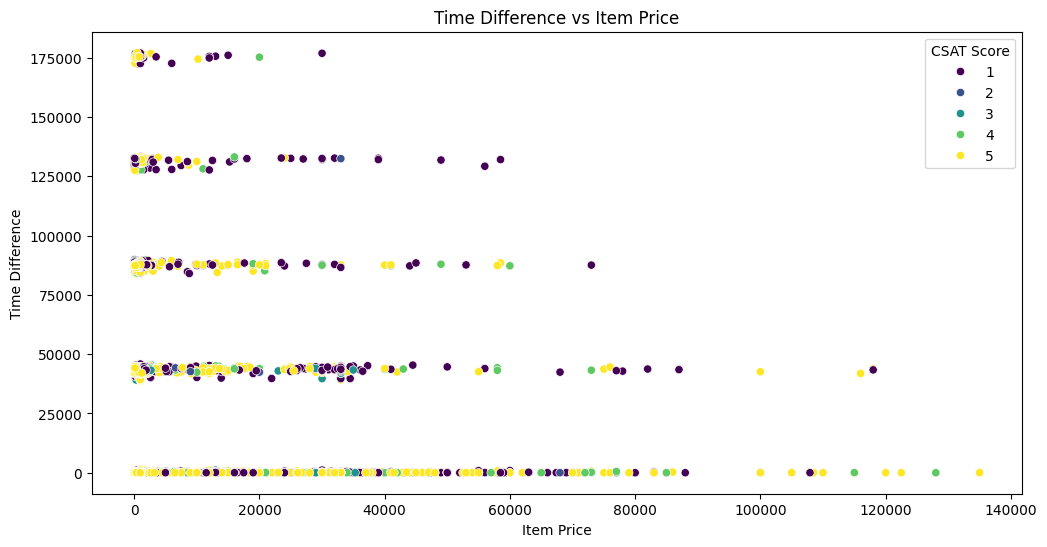

In [26]:
# scatter plot of time difference vs items prices
plt.figure(figsize=(12,6))
sns.scatterplot(x='Item_price', y='Time difference', data=df,hue='CSAT Score',palette='viridis')
plt.title('Time Difference vs Item Price')
plt.xlabel('Item Price')
plt.ylabel('Time Difference')
plt.legend(title='CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

visualizes the relationship between time difference and item price .by using csat scores as the hue it adds a layer of information, showing how customer satisfaction scores vary with these two variables.

##### 2. What is/are the insight(s) found from the chart?

can see if the pattern in customer satisfaction relative to time difference and item price

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

understand the relationship between response times and item prices can help in identifying areas for improvement

#### Chart - 5

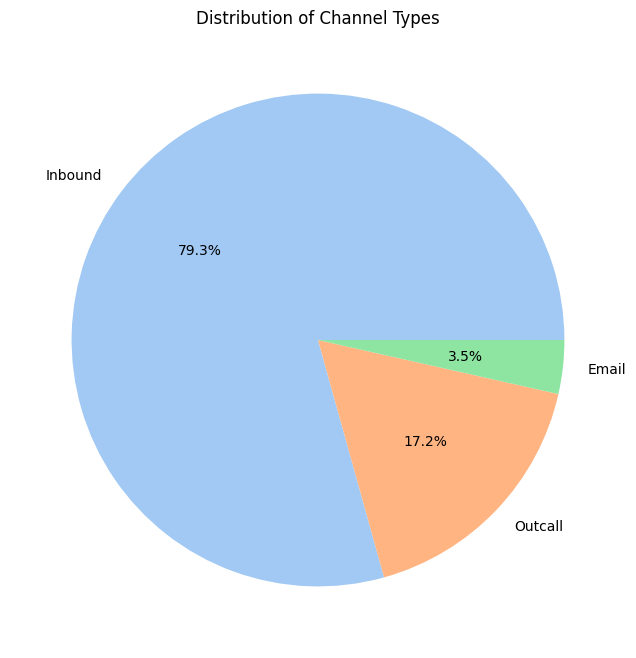

In [27]:
#count the occurences of each channel type
channel_counts = df['channel_name'].value_counts()
#plot pie chart
plt.figure(figsize=(8,8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Channel Types')
plt.show()

##### 1. Why did you pick the specific chart?

pie chart provides a clear visual representation of the distribution of different customers service channel in the dataset

##### 2. What is/are the insight(s) found from the chart?

it helps  to understand which channel are most and least used by customers that is inbound

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it helps in planning and optimizing customer service operations based on channel usage trends

#### Chart - 6

/tmp/ipython-input-231381935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')


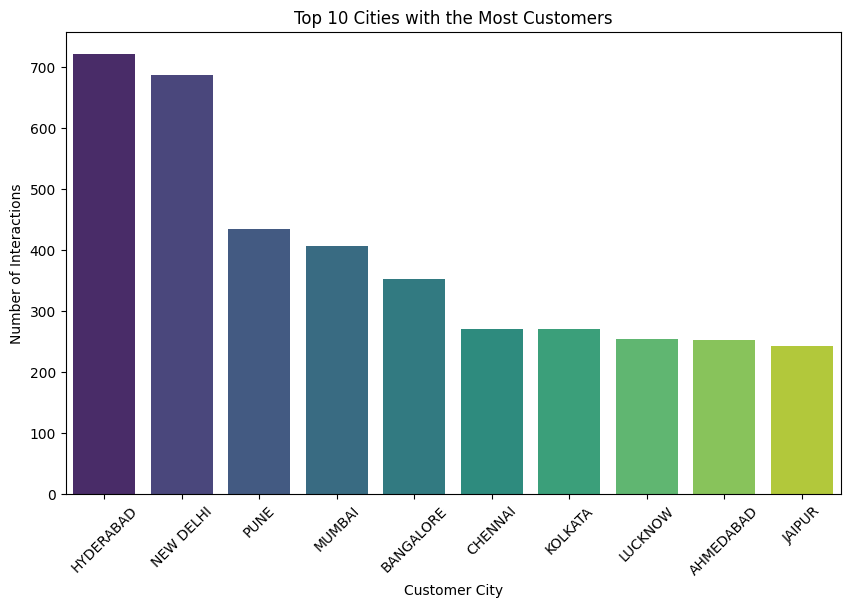

In [28]:
# city count top 10
# count the occurence of each city get the top 10
city_counts = df['Customer_City'].value_counts().head(10)
#plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Top 10 Cities with the Most Customers')
plt.xlabel('Customer City')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

THe bar chart provides a visual representation of the number of interaction or feedback received from the top 10 cities.this helps in understanding the distribution of customer service requests

##### 2. What is/are the insight(s) found from the chart?

Hyderabad is the city from where most customers support closely folowed by new delhi

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes by finding the cities from where most request are acquired much support would be given there

#### Chart - 7

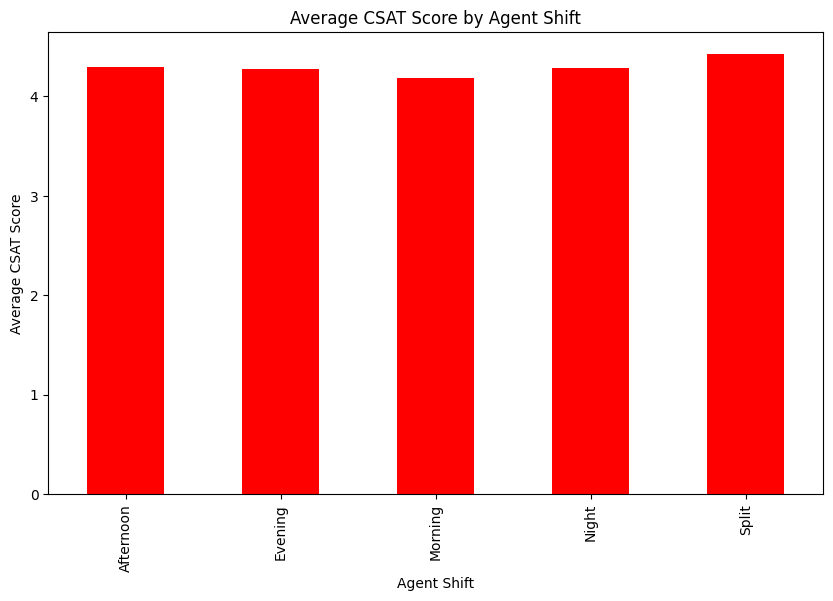

In [29]:
# agent shift vs csat score
plt.figure(figsize=(10,6))
df.groupby('Agent Shift')['CSAT Score'].mean().plot(kind='bar',color='red')
plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score')
plt.show()


##### 1. Why did you pick the specific chart?

It helps in comparing how satisfaction varies across different times of the day when different shifts are handling customer querie

##### 2. What is/are the insight(s) found from the chart?

Most cutomers are calling during split time and mmostly the data have an even distribution


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it helps to find peak time

#### Chart - 8

/tmp/ipython-input-1361322583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product_category', y='CSAT Score', data=df, palette='viridis')


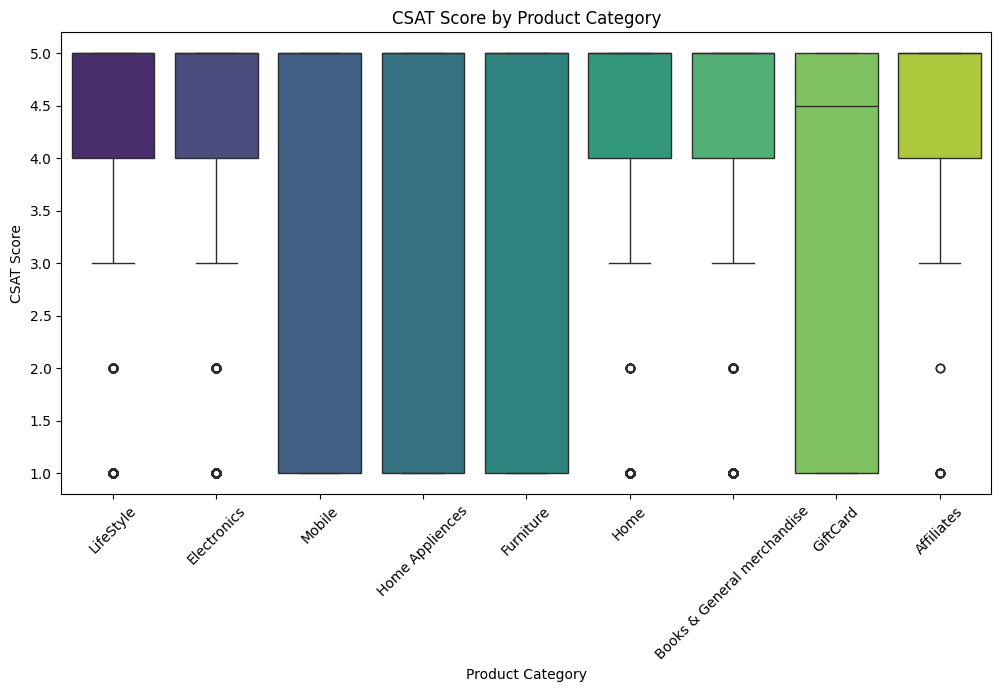

In [30]:
# csat score by product category boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Product_category', y='CSAT Score', data=df, palette='viridis')
plt.title('CSAT Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('CSAT Score')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot visualizes the distribution of csat scores across different prosuct categories.it helps in understanding the range,median and variabilty of customer satisfaction scores for each product category.

##### 2. What is/are the insight(s) found from the chart?

shows how csat scores are distributed within each proct category including the median quartiles and potenstial outlier

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for identifying which product categories are performing well and which might reqire attention or improvement.

#### Chart - 9

/tmp/ipython-input-3520853182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel_name', y='CSAT Score', data=df, palette='viridis')


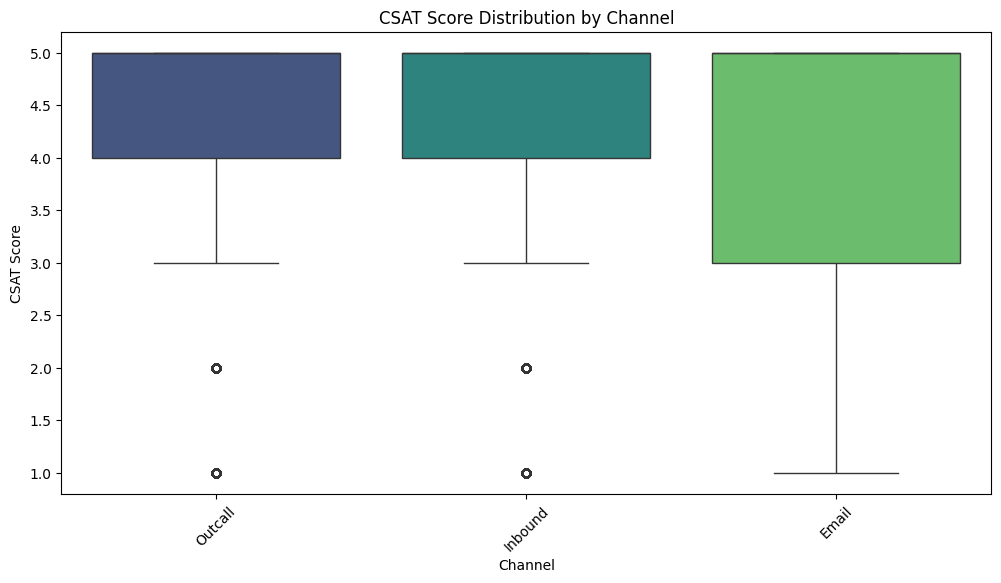

In [31]:
# csat scrore distribution by channel boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='channel_name', y='CSAT Score', data=df, palette='viridis')
plt.title('CSAT Score Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CSAT Score')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

the box plot visualizes the distribution of csat scrores accross different channels

##### 2. What is/are the insight(s) found from the chart?

highlights how satisfaction scores very across different customer service channel revealing which channel may require more focus or improvement

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

shows the most used or frequented channel for customer service and their satifaction frequency

#### Chart - 10

Text(0, 0.5, 'Average CSAT Score')

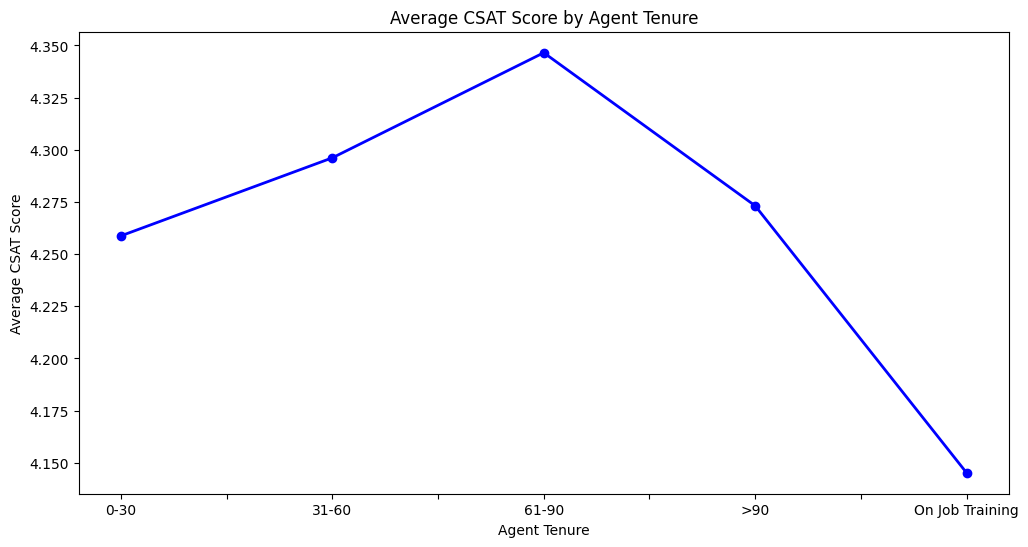

In [32]:
# agent tenure vs average csat scores lineplot
plt.figure(figsize=(12,6))
t=df.groupby('Tenure Bucket')['CSAT Score'].mean()
t.plot(kind='line',color='blue',marker='o',linestyle='-',linewidth=2)
plt.title('Average CSAT Score by Agent Tenure')
plt.xlabel('Agent Tenure')
plt.ylabel('Average CSAT Score')

##### 1. Why did you pick the specific chart?

line plot visualizes trends in average csat scores across different tenure bucket

##### 2. What is/are the insight(s) found from the chart?

61-90 have highest csat score

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this line plot visualizes trends in average csat scores across different tenure bucket making it easier to observe any upward or downward trends as agents gain experience.

#### Chart - 11

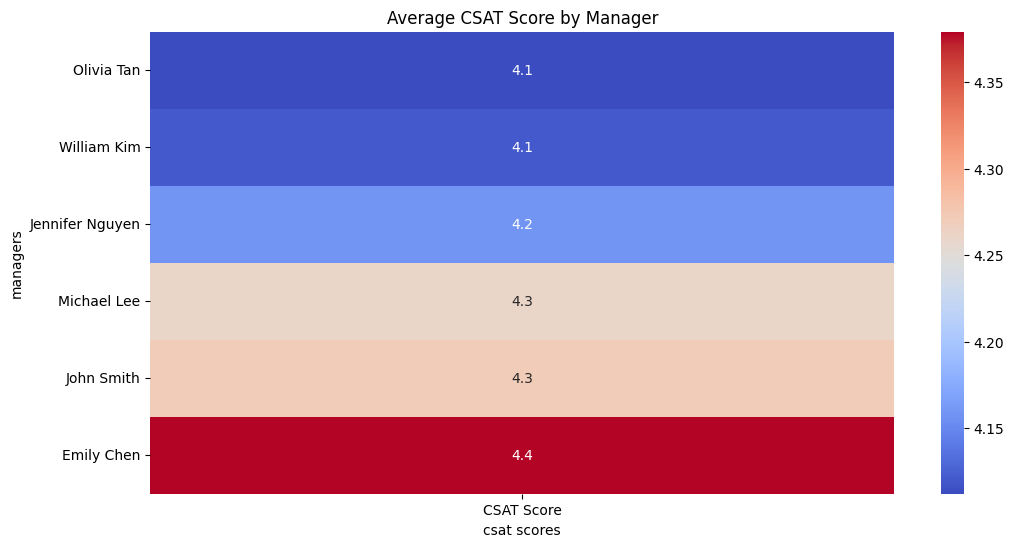

In [33]:
# managers and their average csat score heatmap
plt.figure(figsize=(12,6))
pivot_table = df.pivot_table(index='Manager', values='CSAT Score', aggfunc='mean').sort_values(by='CSAT Score')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Average CSAT Score by Manager')
plt.xlabel('csat scores')
plt.ylabel('managers')
plt.show()

##### 1. Why did you pick the specific chart?

heatmap helps to find the density of a value from the dataset.

##### 2. What is/are the insight(s) found from the chart?

emily chen as a manager have highest csat score

#### Chart - 12

/tmp/ipython-input-3265466849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agent Shift',  data=df,palette='Set2')


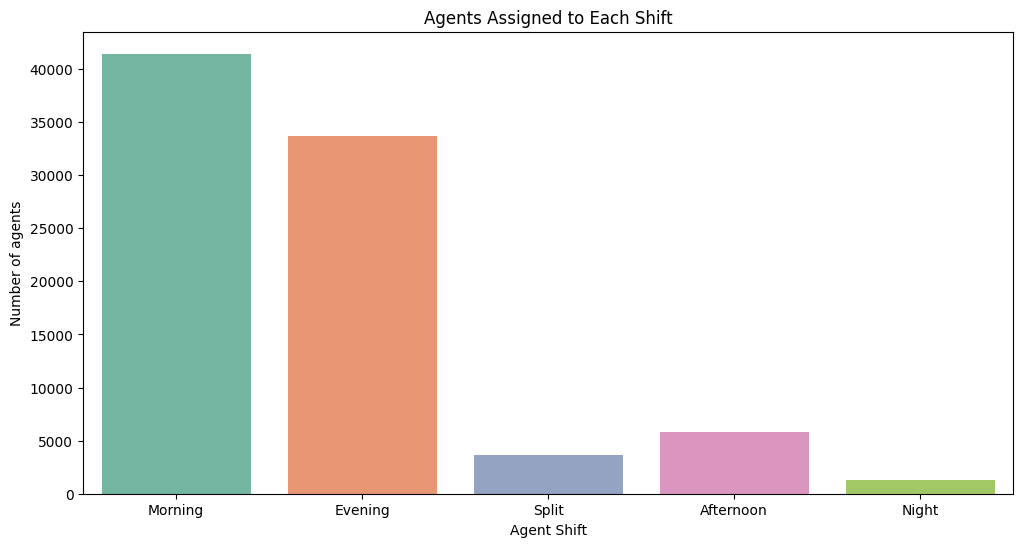

In [34]:
# agents assigned each shift total overtime countplot
plt.figure(figsize=(12,6))
sns.countplot(x='Agent Shift',  data=df,palette='Set2')
plt.title('Agents Assigned to Each Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Number of agents')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot shows categorical value of different shift in total of dataset










##### 2. What is/are the insight(s) found from the chart?

On total most people work in mornings and less people at night

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

can be useful when there is a need to balance the agents working each shift

#### Chart - 13

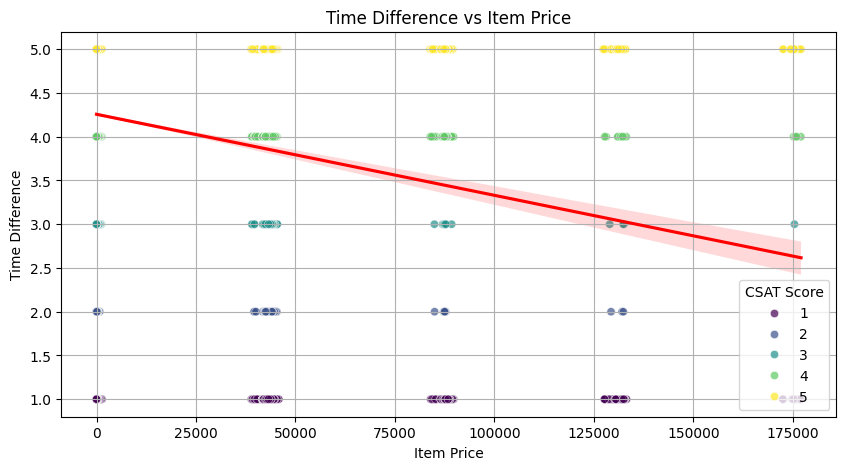

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Time difference', y='CSAT Score', data=df,hue='CSAT Score',palette='viridis',alpha=0.7)
sns.regplot(x='Time difference', y='CSAT Score', data=df, scatter=False, color='red')
plt.title('Time Difference vs Item Price')
plt.xlabel('Item Price')
plt.ylabel('Time Difference')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

scatter plot with regression line help identify any potential realtioship between the two variables.scatter plot.display individual data point representing time  difference and csat score which help visualize the distribution and any potential correlation.regression line .the red line represents the best fit line for the data points showing the trends and direction of the relationship between time difference and csat score

##### 2. What is/are the insight(s) found from the chart?

Helps identify if theres a positive , negative or no correlation between the time taken to handel issues and customer satisfaction score

# Hypothesis Testing


Based on your chart experiments,define hypothetical statements from the dataset.In the next three questions,perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical statement 1

Time difference and CSAT Score

state your reserch hypothesis as null hypothesis and alternate hypothesis

Null Hypothesis(h0):There is no significantly affect customer satisfaction.

Alternate Hypothesis(H1):There is a significant relationship between Time Differnce and CSAT Sore.The time taken to respond to customer issues significantly affects customer satisfaction.

Perform an appropriate statistical test

In [36]:
#Perform statistical test to obatin P-value
from scipy.stats import spearmanr

# Fill missing values in 'Time difference' with the median
df['Time difference'].fillna(df['Time difference'].median(), inplace=True)

correlation, p_value = spearmanr(df['Time difference'], df['CSAT Score'])
print(f"Spearman's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.There is a significant relationship between Time Differnce and CSAT Sore.")
else:
    print("Fail to reject the null hypothesis.There is no significant relationship between Time Differnce and CSAT Sore.")

Spearman's correlation coefficient: -0.11032636348541058
P-value: 8.780582197059892e-231
Reject the null hypothesis.There is a significant relationship between Time Differnce and CSAT Sore.


/tmp/ipython-input-1465515980.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time difference'].fillna(df['Time difference'].median(), inplace=True)


Which statistical test have you done to obatin p value?

Spearman's rank corelation


why did you choose the specific statistical test?


sperman raank correlation analyzes the strength and direction of the association between two ranked variables

Hypothesi Statement 2

Agent shift and average CSAT Score

1.State Your research hypothesu=is as a null hypothesis and alternate hypothesis

Null Hypotheis(H0):There is no significant difference in the average CSAT Score between differnt Agent Shift

Alternate Hypothesis(H1):There is significant difference in average CSAT Score between inthe average CSAT Score between different Agent Shifts.

Perform an appropriate statistical test

In [37]:
#perform statistical test to obtain p value
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
groups=[df[df['Agent Shift'] == shift]['CSAT Score'] for shift in df['Agent Shift'].unique()]
statistic, p_value = kruskal(*groups)

print(f"Kruskal-Wallis statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.There is a significant difference in the average CSAT Score between different Agent Shifts.")
else:
    print("Fail to reject the null hypothesis.There is no significant difference in the average CSAT Score between different Agent Shifts.")

Kruskal-Wallis statistic: 151.58004948556504
P-value: 9.335020551858379e-32
Reject the null hypothesis.There is a significant difference in the average CSAT Score between different Agent Shifts.


Which statistical test  have you done to obtain P value?

Krushkal Wallis H test

Why did you choose the specific stastical test?


Kruskal Wallis H test is used to determine if there are statistically significant difference between the median of three or more idependet groups.A higher statitistic suggest grater diffences between grpou median

Hypothetical statement 3

Item price CSAT Score


state your reserch hypothesis as a null hypothesis and alternate hypothesis

Null Hypotheis(H0):There is no significant correlation between Item Price and CSAT Score

Alternate Hypothesis(H1):There is significant correlation between Item Price and CSAT Score

Perform an appropriate statistical test

In [38]:
import scipy.stats as stats
correlation, p_value = stats.spearmanr(df['Item_price'], df['CSAT Score'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.There is a significant correlation between Item Price and CSAT Score.")
else:
    print("Fail to reject the null hypothesis.There is no significant correlation between Item Price and CSAT Score.")

Pearson correlation coefficient: -0.03394737965612261
P-value: 2.455179983318164e-23
Reject the null hypothesis.There is a significant correlation between Item Price and CSAT Score.


Which statistical test  have you done to obtain P value?

Sperman's Rank Correlation

Why did you v=choose the specific statistical test?

This test helps you determine whetther there's a significant monotonic relationship between item preices and cutomer satisfaction scores

# Feature Engineering and data preprocessing

# 1. handling missing values

In [39]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Order_id,18232
Issue_reported at,53933
issue_responded,54022
Survey_response_Date,0
Customer_City,68828
Product_category,68711


In [40]:
#drop columns
columns_to_drop=['Item_price','Product_category','Customer_City']
df.drop(columns=[col for col in columns_to_drop if col in df.columns],axis=1,inplace=True)

In [41]:
#since order_id is a value to uniquelly identify each row,It is filled using forward/backwar
df['Order_id'].fillna(method='ffill',inplace=True)
df.head()
df.isnull().sum()

/tmp/ipython-input-2669266539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Order_id'].fillna(method='ffill',inplace=True)
/tmp/ipython-input-2669266539.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Order_id'].fillna(method='ffill',inplace=True)


,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Order_id,0
Issue_reported at,53933
issue_responded,54022
Survey_response_Date,0
Agent_name,0
Supervisor,0


 What all missing value imputation techniques have you used and why did you use those techniques?



Columns containing morethan 70% null values are dropped from the dataframe and columns used to uniquely identify each row in dataset is filled in with order ids generateed by forward/backward filling based on the assumption that the same customer or nearby entries might share an order ID

2. Handling Outliers

                                  Unique id channel_name       category  \
11     4c28acf4-2ea4-4be8-b8f1-113e676fc8b7      Inbound  Order Related   
25     c0edcb0a-cfa8-4f35-86ad-88c9f6b47290      Inbound  Order Related   
31     39fb5940-dffe-49bf-8f9b-936cb1994152      Inbound  Order Related   
32     b18b603b-2f31-49e5-8e68-64010c1c5674      Outcall        Returns   
54     2ad4e1cb-60e8-4a0f-91aa-c253c185ba26      Inbound        Returns   
...                                     ...          ...            ...   
85873  d349f69a-8698-4756-bc13-72f86cc3f3b8      Inbound  Order Related   
85876  f6848303-58d5-4641-a1db-756bb844b491      Inbound        Returns   
85882  fa7f7e0a-6ede-4814-be7e-d0974b3c844a      Inbound        Returns   
85887  4b666b79-a622-4e88-b284-bbb7e5d887cf      Inbound        Returns   
85894  6a205a8e-3ae5-41e7-8cca-41fa0e016da3      Inbound       Feedback   

                   Sub-category                              Order_id  \
11                      De

/tmp/ipython-input-124957650.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agent Shift', y='CSAT Score', data=df, palette='Set1')


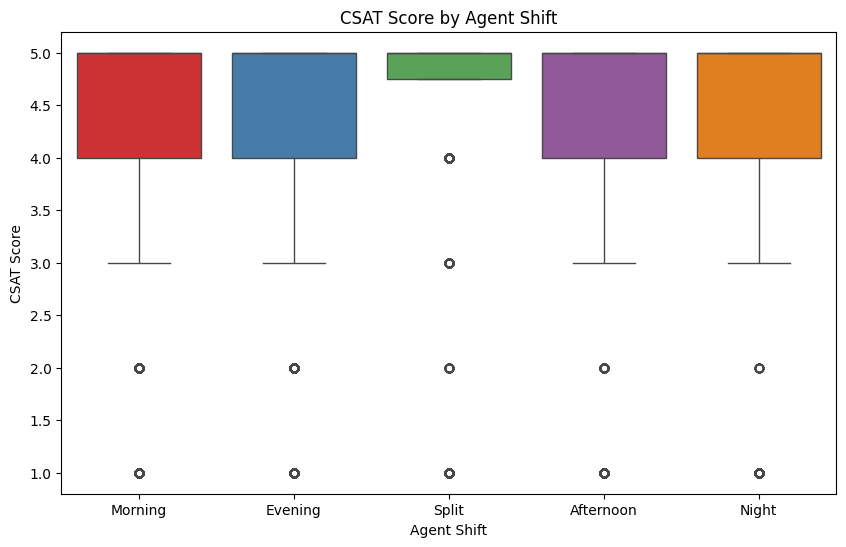

In [42]:
#handling outliers and oulier treatement
#calate the IQR for 'CSAT Score'
Q1 = df['CSAT Score'].quantile(0.25)
Q3 = df['CSAT Score'].quantile(0.75)
IQR = Q3 - Q1

#define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify outlier in "CSAT Score
outliers=df[(df['CSAT Score'] < lower_bound) | (df['CSAT Score'] > upper_bound)]
print(outliers)

#plot CSAT Score by Agent Shift
plt.figure(figsize=(10,6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df, palette='Set1')
plt.title('CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

What all outlier treatment techniques have you used and why did you use those teqniques?

Capped outlier values to boundary values to get the data even

In [43]:
#Reve columns that have no effect on testing like ids and timestamps
to_remove=['Unique Id','Order_id','Issue_reported at','issue_responded','Issue_reported at {formatted}','issue_responded {formatted}','Survey_response_Date']
#loop thrugh colmns and drop if they exist in dataframe
df.drop(columns=[col for col in to_remove if col in df.columns],axis=1,inplace=True)

Textual Data Preprocessing

In [44]:
df.head()

,Unique id,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time,Time difference
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,2040.0,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,120.0,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,1320.0,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,1200.0,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,120.0,2.0


Lower Casting

In [45]:
#lowe Casting
columns_to_clean=['channel_name','category','Sub-category','Manager',"Agent_name",'Supervisor','Tenure Bucket','Agent Shift']
#convert specific column to lower case
df[columns_to_clean]=df[columns_to_clean].applymap(lambda x: x.lower() if isinstance(x,str) else x)

/tmp/ipython-input-1147573621.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_clean]=df[columns_to_clean].applymap(lambda x: x.lower() if isinstance(x,str) else x)


Removing puntuation


In [46]:
#remove puntuation from specified column
import string
for col in columns_to_clean:
  if col in df.columns:
    df[col]=df[col].str.replace(f'[{string.punctuation}]','',regex=True)

Removing url and words and digits contain digits

In [47]:
#remove urls and words and digits contain digit
for col in columns_to_clean:
  if col in df.columns:
    df[col]=df[col].str.replace(r'http\S+|www\S+|https\S+','',regex=True)
    df[col]=df[col].str.replace('\b\w*\d\w*\b','',regex=True)

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2898558631.py:5: SyntaxWarning: invalid escape sequence '\w'
  df[col]=df[col].str.replace('\b\w*\d\w*\b','',regex=True)


Removing White Spaces

In [48]:
#remove white space
for col in columns_to_clean:
  if col in df.columns:
    df[col]=df[col].str.strip()
df.head()

,Unique id,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time,Time difference
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,outcall,product queries,life insurance,richard buchanan,mason gupta,jennifer nguyen,on job training,morning,5,2040.0,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,outcall,product queries,product specific information,vicki collins,dylan kim,michael lee,90,morning,5,120.0,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,inbound,order related,installationdemo,duane norman,jackson park,william kim,on job training,evening,5,1320.0,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,inbound,returns,reverse pickup enquiry,patrick flores,olivia wang,john smith,90,evening,5,1200.0,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,inbound,cancellation,not needed,christopher sanchez,austin johnson,michael lee,030,morning,5,120.0,2.0


Feature Manipulation and Selection

1. Feature Manipulation

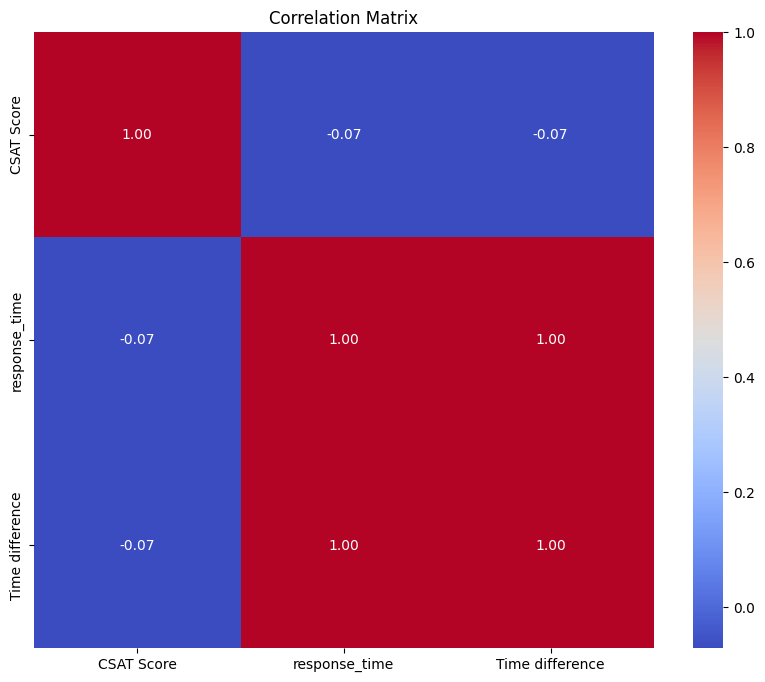

In [49]:
df_numeric=df.select_dtypes(include=['int','float'])
#compute correlation matrix
correlation_matrix=df_numeric.corr()
#create a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

2. Feature Selection

What all feature selection methods have you used and why?


Correlation matrix has been used to find which coulmns have higher connection with CSAT Score and that is selected

Which all features you found import and why?


Time difference is one feature which has higher connection to CSAT Score and its can be used  to predict CSAT Score

# ML Model Implementation

ML Model 1

In [59]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#convert continous CSAT Score into categories for classification
df['CSAT Score Category'] = pd.cut(df['CSAT Score'],bins=[1,2,3,4,5,6],labels=['Very Poor','Poor','Average','Good','Excellent'])

# Fill missing values in 'CSAT Score Category' with the mode
df['CSAT Score Category'].fillna(df['CSAT Score Category'].mode()[0], inplace=True)


#use Label Encoder to convert categorical features(Channelname,Category and Agent shift)
label_encoder=LabelEncoder()
df['channel_name']=label_encoder.fit_transform(df['channel_name'])
df['Agent Shift']=label_encoder.fit_transform(df['Agent Shift'])
df['CSAT Score Category']=label_encoder.fit_transform(df['CSAT Score Category'])

#Select features and target variable
X=df[['Time difference','Agent Shift']]
y=df['CSAT Score Category']

#split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Use SMOTE to oversample the minority class
smote=SMOTE(random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

#train the model
model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

#make prediction
y_pred=model.predict(X_test)

/tmp/ipython-input-2437038123.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CSAT Score Category'].fillna(df['CSAT Score Category'].mode()[0], inplace=True)


Explain the ML Model used and its performance using evaluation metric score chart

In [60]:
#evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')

print(classification_report(y_test,y_pred))

Accuracy:0.12332673728320336
              precision    recall  f1-score   support

           0       0.13      0.91      0.23      2277
           1       0.00      0.00      0.00     14175
           2       0.03      0.05      0.03       503
           3       0.03      0.07      0.04       227

    accuracy                           0.12     17182
   macro avg       0.05      0.26      0.08     17182
weighted avg       0.02      0.12      0.03     17182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross validation and hyperparameter tuning

In [62]:
from sklearn.model_selection import cross_val_score,KFold
#split the data into kfolds
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
#implement cross validation
cv_scores=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
print(f'Cross-validation std:{cv_scores.std()}')
print(f'Mean accuracy:{cv_scores.mean()}')


Cross-validation std:0.11813452831776357
Mean accuracy:0.1751170303166714


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#define parameter grid
param_grid={'C':[0.01,0.1,1,10,100],'solver':['liblinear','saga']}

#set up grid search cv
grid_search=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
best_score=grid_search.best_score_
print(f'Best score:{best_score}')
print(f'Best parameters:{best_params}')

best_model=grid_search.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best score:0.8246198617679156
Best parameters:{'C': 0.01, 'solver': 'liblinear'}


Which hyperparameter optimization teqnique have you used?


Hyperparameter tuning is finding the best parameter the your model to improve its performance.GridSearchCV is used a hyperparameter optimization teqniquesince it works well with classification algorithm.

Have you seen any improvement?Note down the improvement with updates Evaluation metric Score chart

Yes The accuracy score after using grid search cv has went up than initial test of model

# **Conclusion**

Machine Learning model to create a logistic regression task to predict CSAT Score based on features like time difference and agent has been successfully implemented with accuracy score of 82%